In [3]:
#Student ID: 1001420223
#Student name: Aaron Chen
#Instructor: Shion Guha
#Course code: INF2178
#Course name: Experimental Design for Data Science
#Faculty of Information
#University of Toronto
#Technical Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load data from google drive (change path if needed)
dataset = pd.read_excel('/content/drive/MyDrive/inf2178/INF2178_A1_data.xlsx', index_col=0)

In [5]:
dataset.describe()

,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,13986.125844,45.727171,31.627149,29.780271,55.549259,52.798598
std,1705.288632,53.326049,27.127682,26.379416,59.448805,58.792954
min,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000
50%,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000
75%,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000
max,16631.000000,339.000000,234.000000,234.000000,268.000000,268.000000


In [6]:
# get categories of catrgorical column we are interested in and clean null data
# mainly looking at capacity type and program model
print('Capacity Types:')
print(dataset['CAPACITY_TYPE'].unique())
print('Program Models:')
print(dataset['PROGRAM_MODEL'].unique())
dataset = dataset[dataset['PROGRAM_MODEL'].notna()]
print('Program Models cleared null')
print(dataset['PROGRAM_MODEL'].unique())

# also explore program area
print('Program Areas')
print(dataset['PROGRAM_AREA'].unique())

Capacity Types:
['Room Based Capacity' 'Bed Based Capacity']
Program Models:
['Emergency' 'Transitional' nan]
Program Models cleared null
['Emergency' 'Transitional']
Program Areas
['COVID-19 Response' 'Base Shelter and Overnight Services System'
 'Temporary Refugee Response' 'Winter Programs']


In [7]:
dataset.describe()

,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50942.000000,50942.000000,32397.000000,32397.000000,18545.000000,18545.000000
mean,13986.022005,45.728515,31.628145,29.781400,55.549259,52.798598
std,1705.241577,53.326660,27.128189,26.379825,59.448805,58.792954
min,11791.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12233.000000,15.000000,15.000000,14.000000,19.000000,16.000000
50%,14251.000000,28.000000,25.000000,23.000000,35.000000,34.000000
75%,15651.000000,51.000000,43.000000,41.000000,68.000000,66.000000
max,16611.000000,339.000000,234.000000,234.000000,268.000000,268.000000


Text(0.5, 1.0, 'capacity type and program model count')

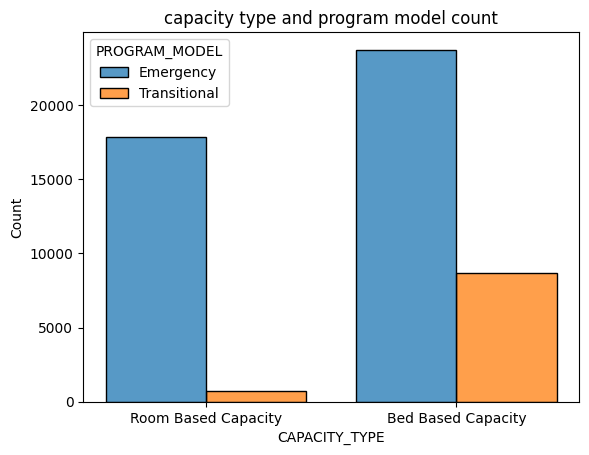

In [8]:
sns.histplot(
    data=dataset[['CAPACITY_TYPE', 'PROGRAM_MODEL']],
    x="CAPACITY_TYPE", hue="PROGRAM_MODEL", multiple="dodge", shrink=.8
).set_title('capacity type and program model count')

Text(0.5, 1.0, 'capacity type and program model porportion')

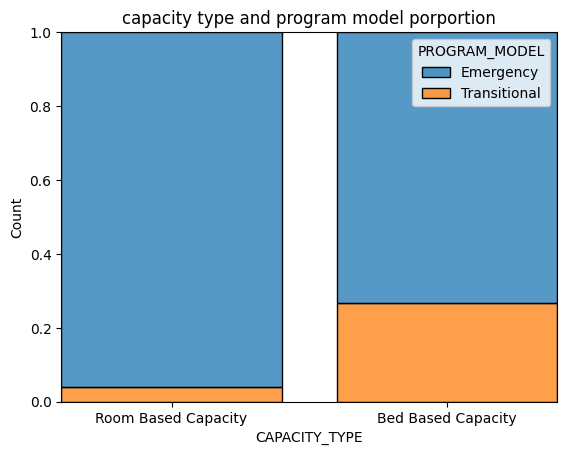

In [9]:
sns.histplot(
    data=dataset[['CAPACITY_TYPE', 'PROGRAM_MODEL']],
    x="CAPACITY_TYPE", hue="PROGRAM_MODEL", multiple="fill", shrink=.8
).set_title('capacity type and program model porportion')

Text(0.5, 1.0, 'histogram of Service User Count of different capacity type')

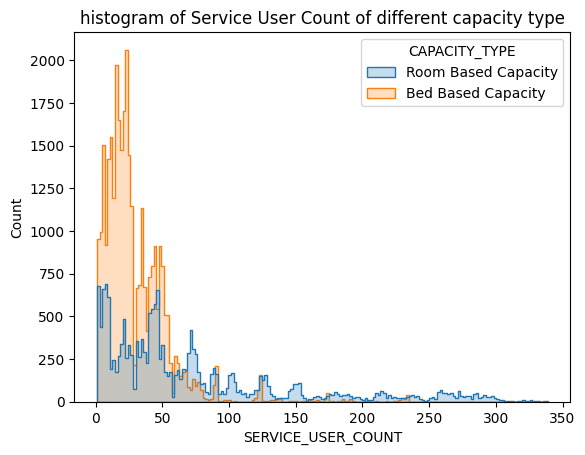

In [10]:
sns.histplot(data=dataset, x="SERVICE_USER_COUNT", hue="CAPACITY_TYPE", element="step").set_title('histogram of Service User Count of different capacity type')

Text(0.5, 1.0, 'boxplot of user count of two capacity type')

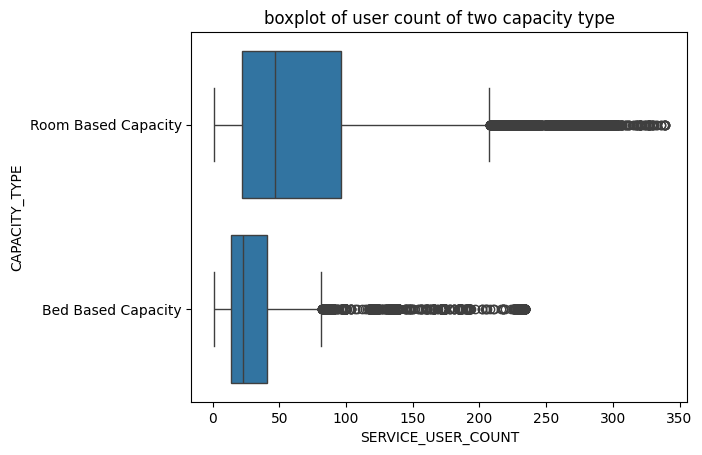

In [11]:
sns.boxplot(data=dataset, x="SERVICE_USER_COUNT", y="CAPACITY_TYPE").set_title('boxplot of user count of two capacity type')

In [12]:
# filter out room capacity type
room_data = dataset[dataset['CAPACITY_TYPE'] == 'Room Based Capacity']
# drop the empty columns
room_data = room_data.drop(columns=['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS'])
# filter out bed capacity type
bed_data = dataset[dataset['CAPACITY_TYPE'] == 'Bed Based Capacity']
# drop empty columns
bed_data = bed_data.drop(columns=['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS'])

([0, 1, 2],
 [Text(0, 0, 'COVID-19 Response'),
  Text(1, 0, 'Temporary Refugee Response'),
  Text(2, 0, 'Base Shelter and Overnight Services System')])

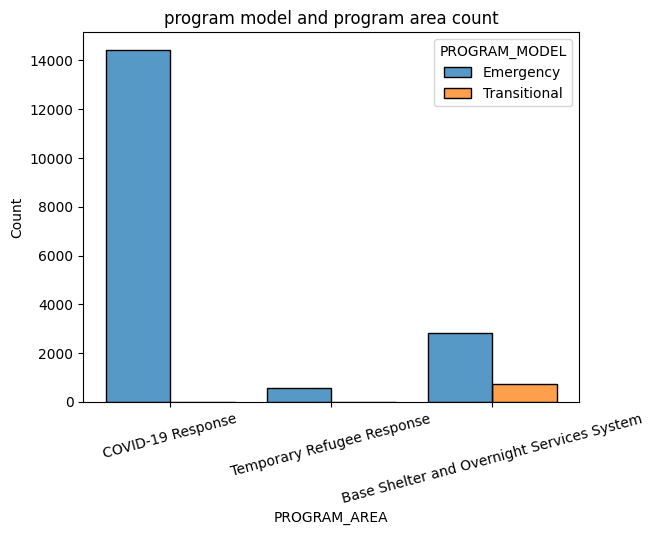

In [13]:
sns.histplot(
    data=room_data[['PROGRAM_MODEL', 'PROGRAM_AREA']],
    x="PROGRAM_AREA", hue="PROGRAM_MODEL", multiple="dodge", shrink=.8
).set_title('program model and program area count')
# rotate so it doesn't overlap
plt.xticks(rotation=15)

In [35]:
# calculate occupany rate for room data
room_data['OCCUPANY_RATES'] = room_data['OCCUPIED_ROOMS'] / room_data['CAPACITY_ACTUAL_ROOM']
print('room count:', len(room_data))
# filter out all room that is not occupied
not_fully_occupied_room_data = room_data[room_data['OCCUPANY_RATES'] != 1]
print('not full room count: ', len(not_fully_occupied_room_data))

room count: 18545
not full room count:  7024


In [34]:
room_data[['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS', 'OCCUPANY_RATES']].describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANY_RATES
count,18545.000000,18545.000000,18545.000000,18545.000000
mean,73.587166,55.549259,52.798598,0.934087
std,73.319030,59.448805,58.792954,0.163241
min,1.000000,1.000000,1.000000,0.012048
25%,22.000000,19.000000,16.000000,0.958333
50%,47.000000,35.000000,34.000000,1.000000
75%,96.000000,68.000000,66.000000,1.000000
max,339.000000,268.000000,268.000000,1.014085


Text(0.5, 1.0, 'Service user count histogram by Program Area')

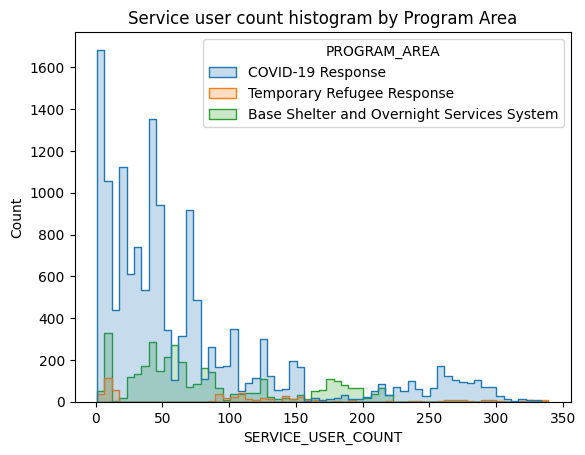

In [39]:
sns.histplot(data=room_data, x="SERVICE_USER_COUNT", hue="PROGRAM_AREA", element="step").set_title('Service user count histogram by Program Area')

In [36]:
bed_data['OCCUPANY_RATES'] = bed_data['OCCUPIED_BEDS'] / bed_data['CAPACITY_ACTUAL_BED']
print('bed count:', len(bed_data))
# filter out all bed that is not occupied
not_fully_occupied_bed_data = bed_data[bed_data['OCCUPANY_RATES'] != 1]
print('not full bed count: ', len(not_fully_occupied_bed_data))

bed count: 32397
not full bed count:  15582


In [37]:
bed_data[['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'OCCUPANY_RATES']].describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,OCCUPANY_RATES
count,32397.000000,32397.000000,32397.000000,32397.000000
mean,29.781400,31.628145,29.781400,0.927895
std,26.379825,27.128189,26.379825,0.122558
min,1.000000,1.000000,1.000000,0.022727
25%,14.000000,15.000000,14.000000,0.900000
50%,23.000000,25.000000,23.000000,1.000000
75%,41.000000,43.000000,41.000000,1.000000
max,234.000000,234.000000,234.000000,1.000000


([0, 1, 2],
 [Text(0, 0, 'Base Shelter and Overnight Services System'),
  Text(1, 0, 'COVID-19 Response'),
  Text(2, 0, 'Winter Programs')])

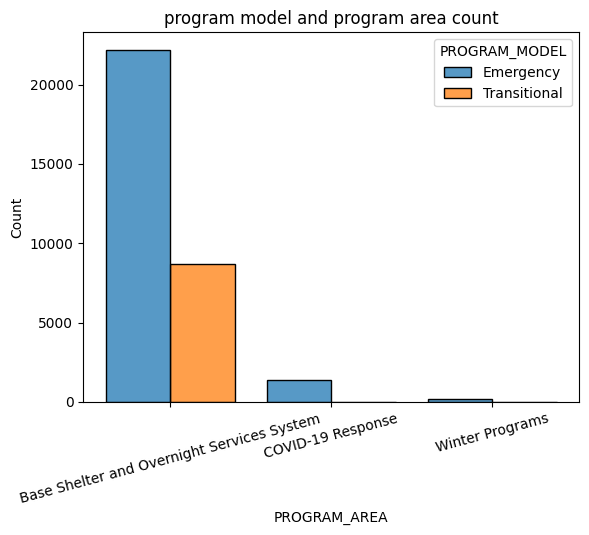

In [32]:
sns.histplot(
    data=bed_data[['PROGRAM_MODEL', 'PROGRAM_AREA']],
    x="PROGRAM_AREA", hue="PROGRAM_MODEL", multiple="dodge", shrink=.8
).set_title('program model and program area count')
# rotate so it doesn't overlap
plt.xticks(rotation=15)

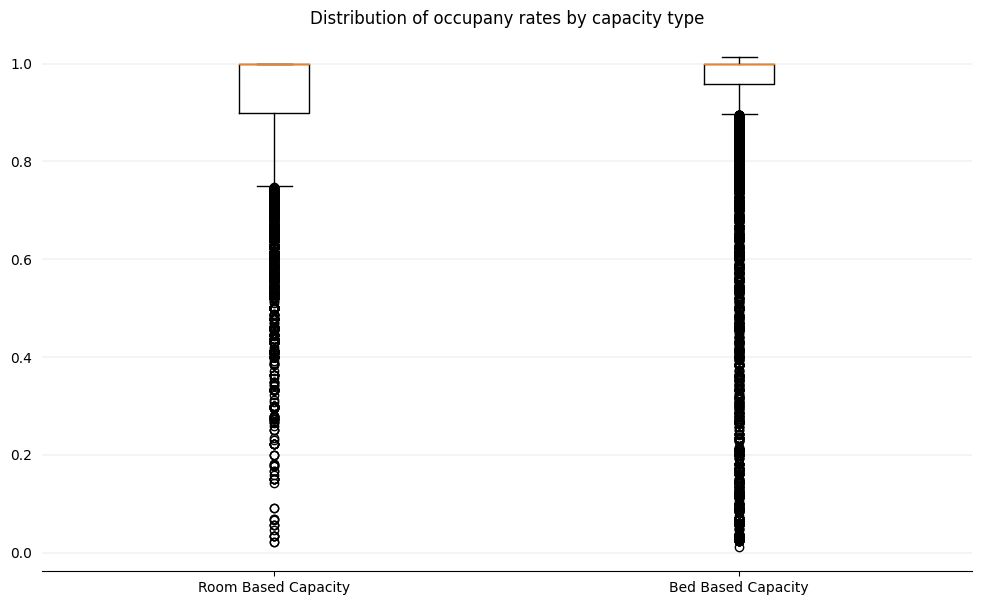

In [41]:
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution of occupany rates by capacity type')

tmp_df = [bed_data['OCCUPANY_RATES'], room_data['OCCUPANY_RATES']]

labels = dataset['CAPACITY_TYPE'].unique()
ax.boxplot(tmp_df, labels=labels)
plt.show()

In [42]:
combine = room_data.merge(bed_data, how='outer')

In [43]:
combine.describe()

,PROGRAM_ID,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANY_RATES,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS
count,50942.000000,50942.000000,18545.000000,18545.000000,50942.000000,32397.000000,32397.000000
mean,13986.022005,45.728515,55.549259,52.798598,0.930149,31.628145,29.781400
std,1705.241577,53.326660,59.448805,58.792954,0.138786,27.128189,26.379825
min,11791.000000,1.000000,1.000000,1.000000,0.012048,1.000000,1.000000
25%,12233.000000,15.000000,19.000000,16.000000,0.923077,15.000000,14.000000
50%,14251.000000,28.000000,35.000000,34.000000,1.000000,25.000000,23.000000
75%,15651.000000,51.000000,68.000000,66.000000,1.000000,43.000000,41.000000
max,16611.000000,339.000000,268.000000,268.000000,1.014085,234.000000,234.000000


Text(0.5, 1.0, 'occupany rate box plot different program model and program area')

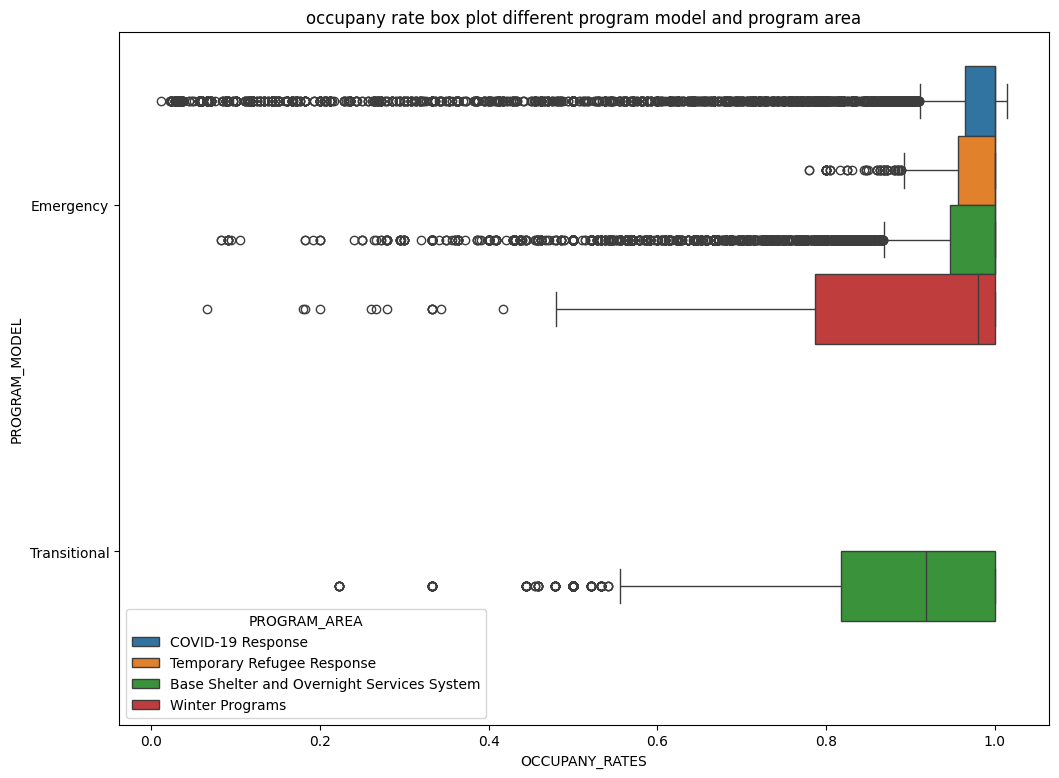

In [49]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.boxplot(data=combine, x="OCCUPANY_RATES", y="PROGRAM_MODEL", hue='PROGRAM_AREA').set_title('occupany rate box plot different program model and program area')

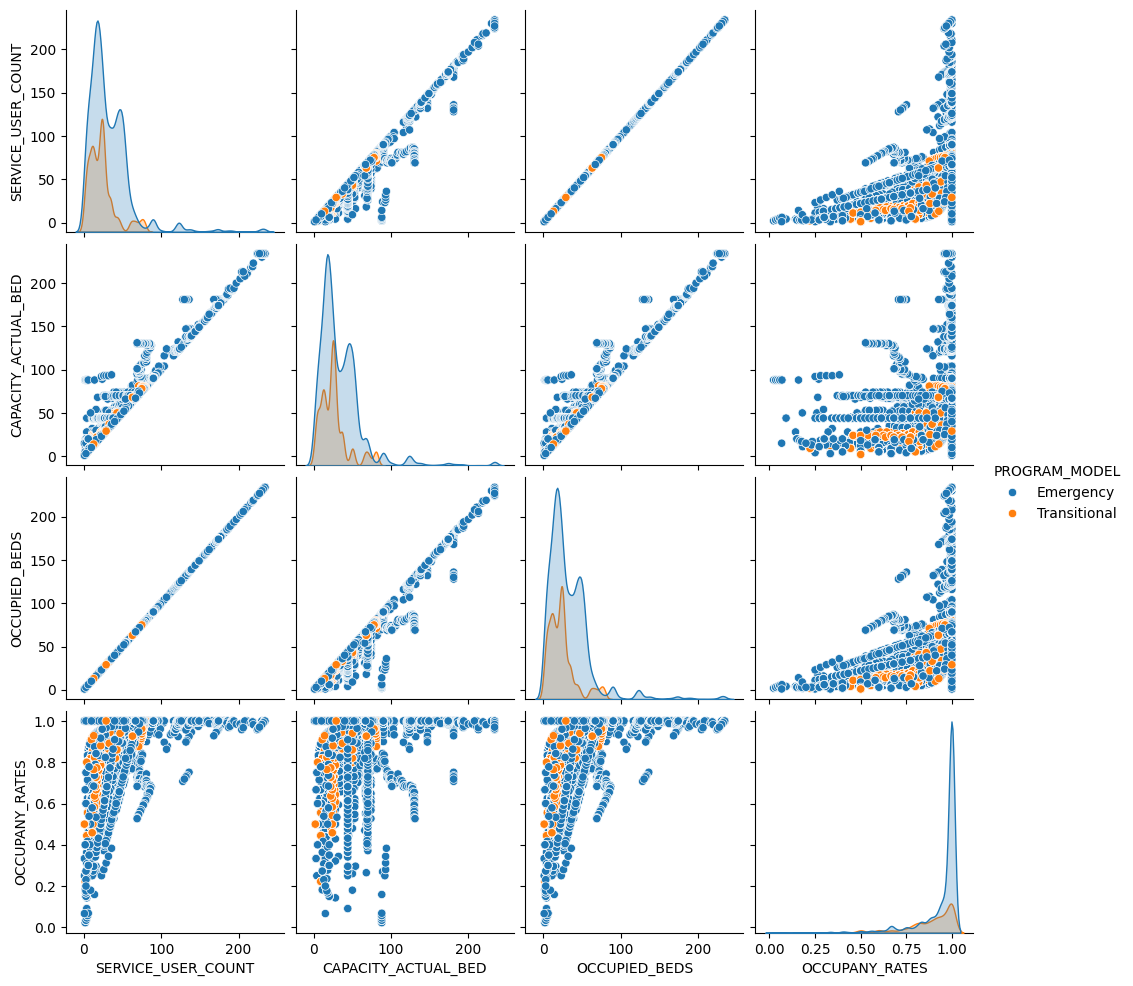

In [55]:
sns.pairplot(bed_data, vars=['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'OCCUPANY_RATES'], hue='PROGRAM_MODEL')

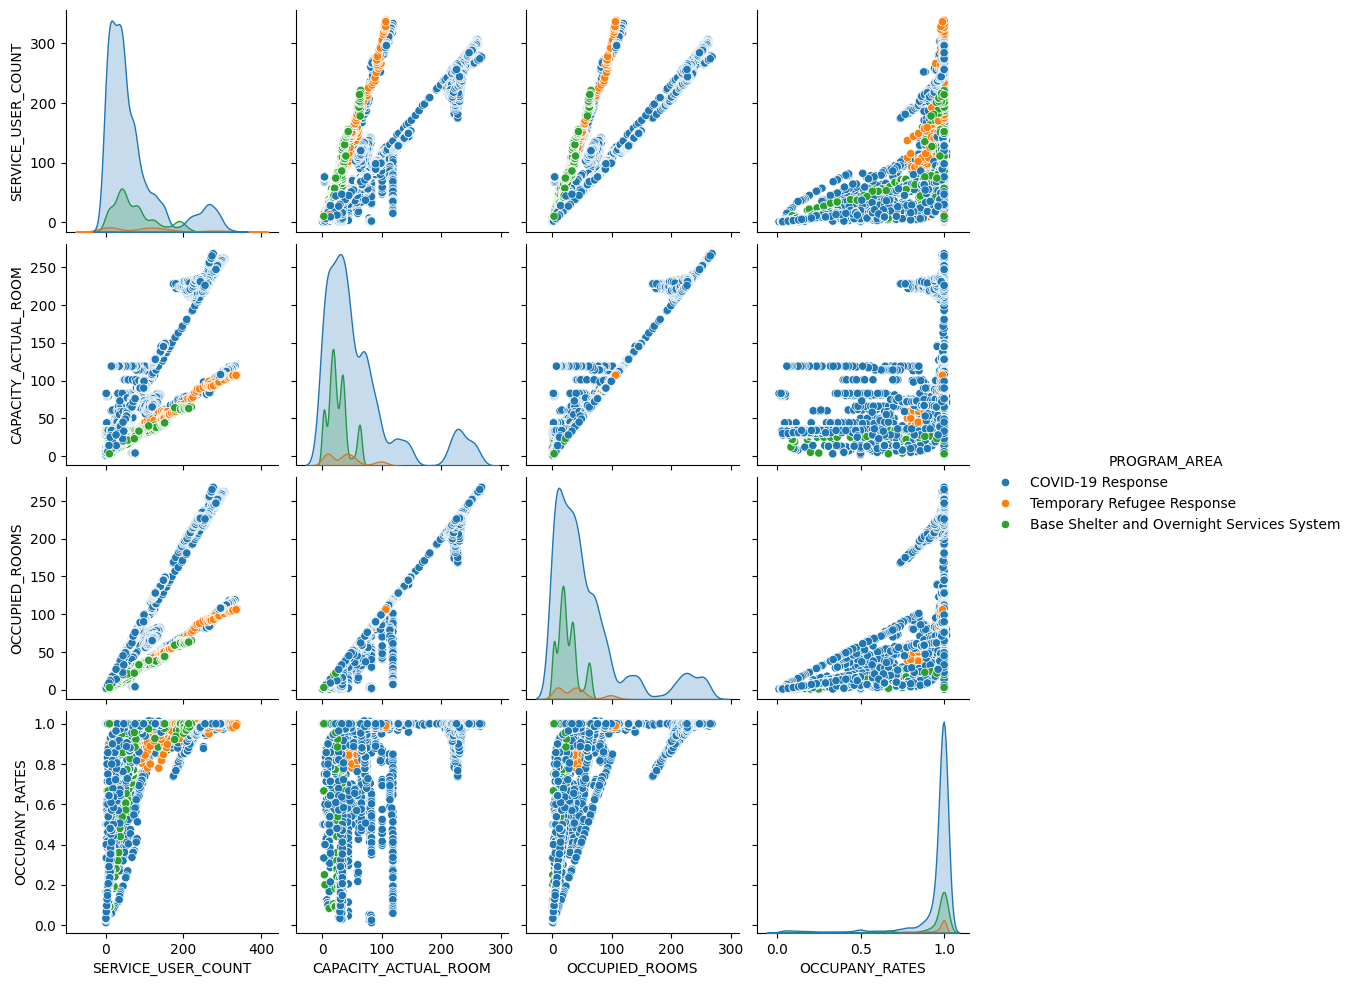

In [ ]:
sns.pairplot(room_data[(room_data['PROGRAM_MODEL'] == 'Emergency')], vars=['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS', 'OCCUPANY_RATES'], hue='PROGRAM_AREA')

In [57]:
def two_sample_ttest(x, y):
  t_stat, p_val = stats.ttest_ind(x, y)
  print("t-statistic = " + str(t_stat))
  print("p-value = " + str(p_val))

In [62]:
# ttest on two capacity type on the overall dataset occupany rates
x = room_data['OCCUPANY_RATES']
y = bed_data['OCCUPANY_RATES']
print('ttest on two capacity type on the overall dataset occupany rates')
two_sample_ttest(x, y)

ttest on two capacity type on the overall dataset occupany rates
t-statistic = 4.845858377006688
p-value = 1.2643561358159322e-06


In [64]:
# sample t-test check if occupany rates's population mean is 1
mu = 1
t_stat, p_val = stats.ttest_1samp(a=combine['OCCUPANY_RATES'], popmean = mu)
print('sample t-test check if occupany rates population mean is 1')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

sample t-test check if occupany rates population mean is 1
t-statistic = -113.59634972790509
p-value = 0.0


In [65]:
# ttest on two capacity type on the overall dataset user count
x = room_data['SERVICE_USER_COUNT']
y = bed_data['SERVICE_USER_COUNT']
print('ttest on two capacity type on the overall dataset user count')
two_sample_ttest(x, y)

ttest on two capacity type on the overall dataset user count
t-statistic = 97.11765613519675
p-value = 0.0


In [69]:
# ttest on two program model on the overall dataset user count
x = dataset[dataset['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
y = dataset[dataset['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']
print('ttest on two program model on the overall dataset user count')
two_sample_ttest(x,y)

ttest on two program model on the overall dataset user count
t-statistic = 29.937570467283667
p-value = 3.1720139638162956e-195


In [70]:
# ttest on two program model on the overall dataset occupany rates
x = combine[combine['PROGRAM_MODEL'] == 'Emergency']['OCCUPANY_RATES']
y = combine[combine['PROGRAM_MODEL'] == 'Transitional']['OCCUPANY_RATES']
print('ttest on two program model on the overall dataset occupany rates')
two_sample_ttest(x,y)

ttest on two program model on the overall dataset occupany rates
t-statistic = 39.07496980654121
p-value = 0.0


In [53]:
# ttest on two program model in room capacity type
x = room_data[room_data['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
y = room_data[room_data['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']
two_sample_ttest(x,y)

t-statistic = -18.898280898458804
p-value = 6.498123940752879e-79


In [67]:
# ttest on two program model in room capacity type
x = room_data[room_data['PROGRAM_MODEL'] == 'Emergency']['OCCUPANY_RATES']
y = room_data[room_data['PROGRAM_MODEL'] == 'Transitional']['OCCUPANY_RATES']
two_sample_ttest(x,y)

t-statistic = 18.903262158430557
p-value = 5.923255977527666e-79


In [54]:
# ttest on two program model in bed capacity type
x = bed_data[bed_data['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
y = bed_data[bed_data['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']
two_sample_ttest(x,y)

t-statistic = 27.414488367392458
p-value = 1.3637601442103477e-163


In [68]:
# ttest on two program model in bed capacity type
x = bed_data[bed_data['PROGRAM_MODEL'] == 'Emergency']['OCCUPANY_RATES']
y = bed_data[bed_data['PROGRAM_MODEL'] == 'Transitional']['OCCUPANY_RATES']
two_sample_ttest(x,y)

t-statistic = 38.780694714817365
p-value = 0.0


In [75]:
# Covid-19 model full capacity?
mu = 1
t_stat, p_val = stats.ttest_1samp(a=combine[combine['PROGRAM_AREA'] == 'COVID-19 Response']['OCCUPANY_RATES'], popmean = mu)
print('sample t-test check if occupany rates population mean is 1')
print('Covid-19 model full capacity?')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

sample t-test check if occupany rates population mean is 1
Covid-19 model full capacity?
t-statistic = -49.340636491758765
p-value = 0.0
